## Revenue and Expenses by parties in 2016 Brazil's Election

This is a sample notebook I did as an activity for Python for Data Journalists MOOC.

In [31]:
import pandas as pd

In [32]:
%matplotlib inline

Import the Revenue and Expends data indicating separator, encoding and decimal (as I could notice the default is ".", but in Brazil we generally use "," as a decimal separator). 
The data about Expends is large, so I had to use "low_memory=False" although I think it's not the best way to do it.

In [33]:
revenues_parties = pd.read_csv("/Users/Buda/Downloads/prestacao_contas_final_2016/receitas_partidos_prestacao_contas_final_2016_brasil.txt", sep=";", encoding = "latin_1", decimal = ",")

In [34]:
spends_parties = pd.read_csv("/Users/Buda/Downloads/prestacao_contas_final_2016/despesas_partidos_prestacao_contas_final_2016_brasil.txt", sep=";", encoding = "latin_1", low_memory = False, decimal =",")

The database I'm using is a little bit confusing. I had to rename all the columns because there was space between the names.
So reset a value for "spends_parties", now called just "spends", used the pandas object ".rename" to change the name of the columns. The same for the revenues.

In [35]:
spends = spends_parties.rename(columns={"Cód. Eleição": "Cod_eleicao", "Desc. Eleição": "Desc_eleicao", "Data e hora": "Data_hora", "CNPJ Prestador Conta": "CNPJ_Prestador_Conta", "Sequencial do Prestador de conta": "Sequencial_Prestador_conta", "Sigla da UE": "Sigla_UE", "Nome da UE": "Nome_UE", "Tipo diretorio": "Tipo_diretorio", "Sigla  Partido": "Partido", "Tipo do documento": "Tipo_documento", "Número do documento": "Num_documento", "CPF/CNPJ do fornecedor": "CPF_CNPJ_fornecedor", "Nome do fornecedor": "Nome_fornecedor", "Nome do fornecedor (Receita Federal)": "Nome_fornecedor_Receita_Federal", "Cod setor econômico do fornecedor": "Cod_setor_econômico_fornecedor", "Data da despesa": "Data_despesa", "Valor despesa": "Valor_despesa", "Tipo despesa": "Tipo_despesa", "Descrição da despesa": "Descrição_despesa" })

In [36]:
revenues = revenues_parties.rename(columns={"Cód. Eleição": "Cod_eleicao", "Desc. Eleição": "Desc_eleicao", "Data e hora": "Data_hora", "CNPJ Prestador Conta": "CNPJ_Prestador_Conta", "Sequencial do Prestador de conta": "Sequencial_Prestador_conta", "Sigla da UE": "Sigla_UE", "Nome da UE": "Nome_UE", "Tipo diretorio": "Tipo_diretorio", "Sigla  Partido": "Partido", "Número recibo eleitoral": "Num_recibo_eleitoral", "Número do documento": "Num_documento", "CPF/CNPJ do doador": "CPF_CNPJ_doador", "Nome do doador": "Nome_doador", "Nome do doador (Receita Federal)": "Nome_doador_Receita_Federal", "Sigla UE doador": "UE_doador", "Número partido doador": "Número_partido_doador", "Cod setor econômico do doador": "Cod_setor_econômico_doador","Setor econômico do doador": "Setor_econômico_doador", "Data da receita": "Data_receita", "Valor receita": "Valor_receita", "Tipo receita": "Tipo_receita", "Fonte recurso": "Fonte_recurso", "Espécie recurso": "Espécie_recurso", "Descrição da receita": "Descrição_receita", "CPF/CNPJ do doador originário": "CPF_CNPJ_doador_originário", "Nome do doador originário": "Nome_doador_originário", "Tipo doador originário": "Tipo_doador_originário", "Setor econômico do doador originário": "Setor_econômico_doador_originário", "Nome do doador originário (Receita Federal)": "Nome_doador_originário_Receita_Federal"})

Now I sum all the values each party spent:

In [37]:
spendsbyparties = spends.groupby("Partido")["Valor_despesa"].sum()

Afeter doing that my variable isn't a DataFrame anymore. It's a Series. So I have to turn it into a DatatFrame again:

In [38]:
spendsbyparties = pd.DataFrame({"Partido":spendsbyparties.index, "Valor_despesa":spendsbyparties.values})

Repeat the process for the revenues data:

In [39]:
revenuesbyparties = revenues.groupby("Partido")["Valor_receita"].sum()

In [40]:
revenuesbyparties = pd.DataFrame({"Partido":revenuesbyparties.index, "Valor_receita":revenuesbyparties.values})

Now I want to merge the two DataFrames. It's possible because they have two columns in common:

In [41]:
merged = pd.merge(revenuesbyparties, spendsbyparties, on="Partido")

Now I'm subtracting Spends from Revenues to see the balance and creating a new column called "Saldo"(balance):

In [42]:
merged['Saldo'] = merged['Valor_receita'] - merged['Valor_despesa']

In [43]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 4 columns):
Partido          34 non-null object
Valor_receita    34 non-null float64
Valor_despesa    34 non-null float64
Saldo            34 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.2+ KB


Sorting values to see which party received more, spent more, had the best and worst balances:

In [46]:
top_revenues = merged.sort_values("Valor_receita", ascending=False).head(5)

In [47]:
top_revenues

,Partido,Valor_receita,Valor_despesa,Saldo
8,PMDB,57630349.03,6.296035e+07,-5.330005e+06
10,PP,51744142.57,5.251818e+07,-7.740371e+05
21,PSDB,50189537.54,5.113937e+07,-9.498303e+05
20,PSD,45664565.98,4.392323e+07,1.741334e+06
18,PSB,38294736.44,4.344632e+07,-5.151583e+06


In [48]:
top_spends = merged.sort_values("Valor_despesa", ascending=False).head(5)

In [49]:
top_spends

,Partido,Valor_receita,Valor_despesa,Saldo
8,PMDB,57630349.03,6.296035e+07,-5.330005e+06
10,PP,51744142.57,5.251818e+07,-7.740371e+05
21,PSDB,50189537.54,5.113937e+07,-9.498303e+05
20,PSD,45664565.98,4.392323e+07,1.741334e+06
18,PSB,38294736.44,4.344632e+07,-5.151583e+06


In [50]:
top_balance = merged.sort_values("Saldo", ascending=False).head(5)

In [ ]:
top_balance

In [52]:
top_debt = merged.sort_values("Saldo").head(5)

In [53]:
top_debt

,Partido,Valor_receita,Valor_despesa,Saldo
8,PMDB,57630349.03,6.296035e+07,-5.330005e+06
18,PSB,38294736.44,4.344632e+07,-5.151583e+06
4,PDT,11433157.28,1.527539e+07,-3.842232e+06
27,PT do B,8361288.65,1.141865e+07,-3.057362e+06
5,PEN,6552524.99,8.991227e+06,-2.438702e+06


Creating charts with matplotlib:

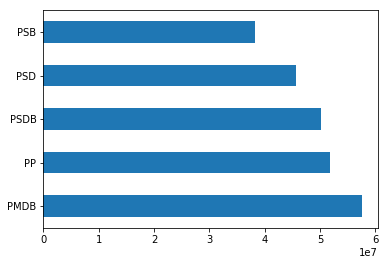

In [62]:
chart = top_revenues.Valor_receita.plot.barh()
chart.set_yticklabels(top_revenues.Partido)

Import "merged" to csv:

In [63]:
merged.to_csv("Contabilidade_partidos_Eleicoes_2016")